In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv('LoL_champions.csv')

In [2]:
print(data.head())

      Name               Tags        Role Range type Resourse type  Base HP  \
0   Aatrox            Fighter         Top      Melee    Blood Well      650   
1     Ahri      Mage,Assassin      Middle     Ranged          Mana      590   
2    Akali           Assassin  Top,Middle      Melee        Energy      600   
3   Akshan  Marksman,Assassin      Middle     Ranged          Mana      630   
4  Alistar       Tank,Support     Support      Melee          Mana      685   

   HP per lvl  Base mana  Mana per lvl  Movement speed  ...  Attack range  \
0         114          0           0.0             345  ...           175   
1         104        418          25.0             330  ...           550   
2         119        200           0.0             345  ...           125   
3         107        350          40.0             330  ...           500   
4         120        350          40.0             330  ...           125   

   HP regeneration  HP regeneration per lvl  Mana regeneration

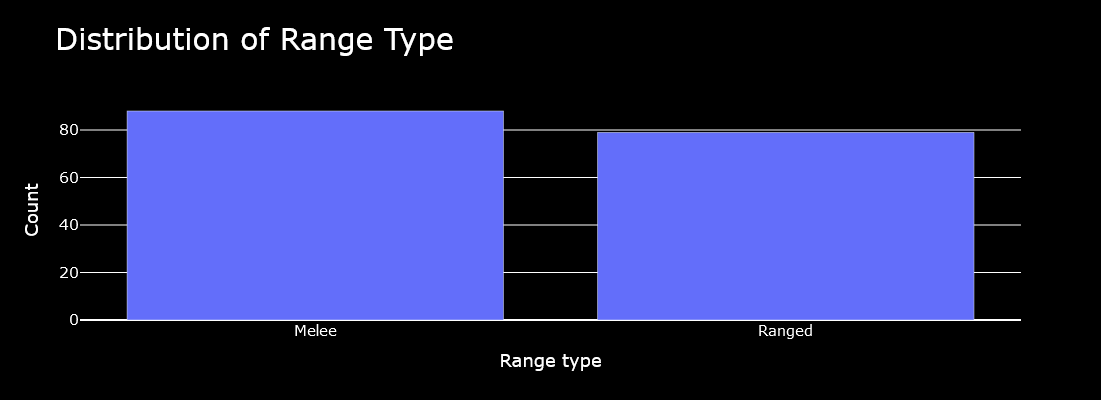

In [3]:
#Range Type
import plotly.express as px
df=pd.DataFrame(data)
RT_counts=df['Range type'].value_counts()
fig=px.bar(RT_counts,x=RT_counts.index,y=RT_counts.values,title='Distribution of Range Type',labels={"x":"Categories","y":'Count'})
fig.update_layout(plot_bgcolor='#000000',paper_bgcolor='#000000',font=dict(color='white',size=15),title_font=dict(size=30),legend_font=dict(color='white',size=12),
                  width=500,height=400)
fig.show()

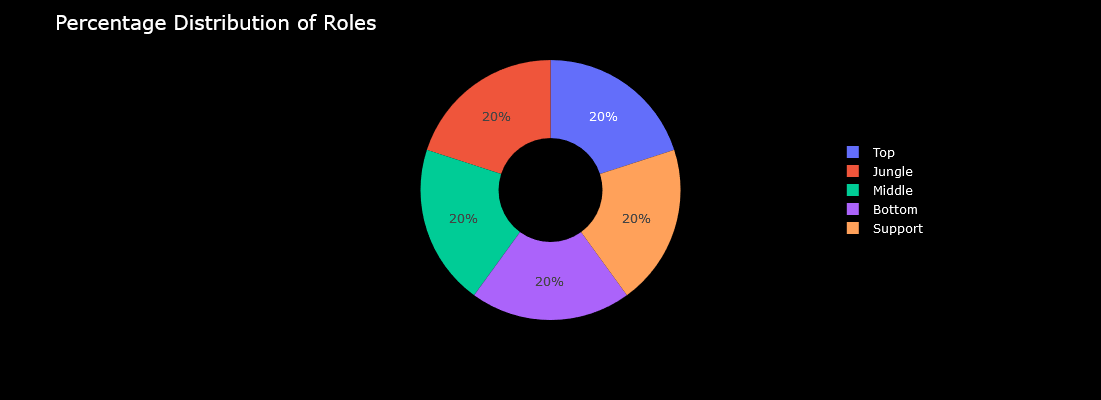

In [7]:
top_counts=df[df['Role']=='Top'].value_counts()
jungle_counts=df[df['Role']=='Top'].value_counts()
mid_counts=df[df['Role']=='Top'].value_counts()
bot_counts=df[df['Role']=='Top'].value_counts()
support_counts=df[df['Role']=='Top'].value_counts()

role_data={'Role':['Top','Jungle','Middle','Bottom','Support'],
           'Count':[top_counts,jungle_counts,mid_counts,bot_counts,support_counts]}
role_df=pd.DataFrame(role_data)
role_counts=role_df['Role'].value_counts()
roles_perc=(role_counts/role_counts.sum())/100
fig1=px.pie(values=roles_perc,names=roles_perc.index,labels={'names':"Roles",'values':'Percentage'},
            hole=0.4)

fig1.update_layout(
    title={
        'text': 'Percentage Distribution of Roles',
        'font': dict(size=20, color='white')
    },
    plot_bgcolor='#000000',
    paper_bgcolor='#000000',
    font=dict(color='white', size=12),
    legend=dict(x=0.8, y=0.5),
    legend_font=dict(color='white', size=12),
    width=600,
    height=400
)
fig1.show()

In [12]:
print(top_counts.sum())
print(jungle_counts.sum())
print(mid_counts.sum())
print(bot_counts.sum())
print(support_counts.sum())

24
24
24
24
24


### Chart distribution of Roles

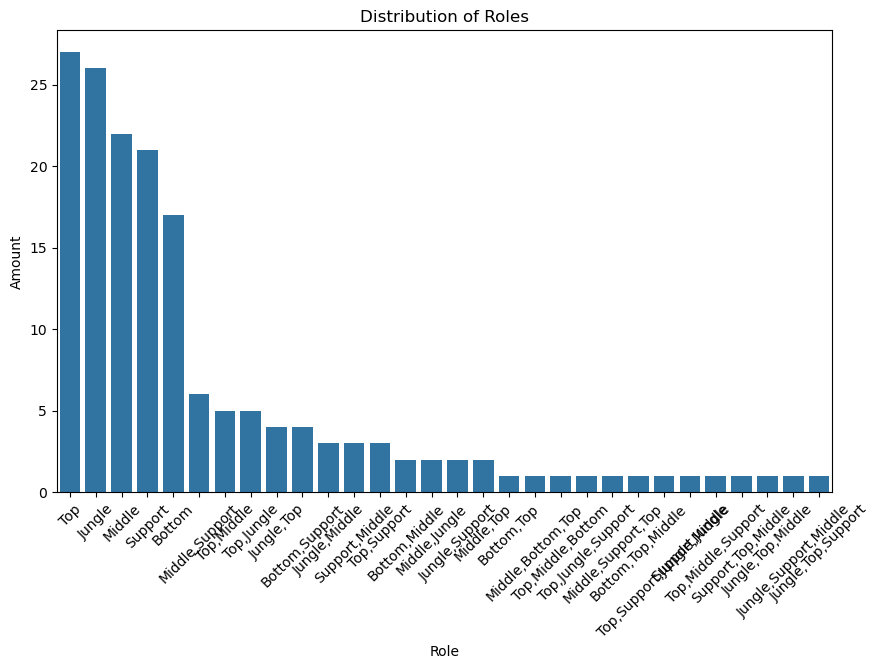

In [16]:
df=pd.DataFrame(data)
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Role',order=df['Role'].value_counts().index)
plt.title('Distribution of Roles')
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.show()

## Correlation Heatmap

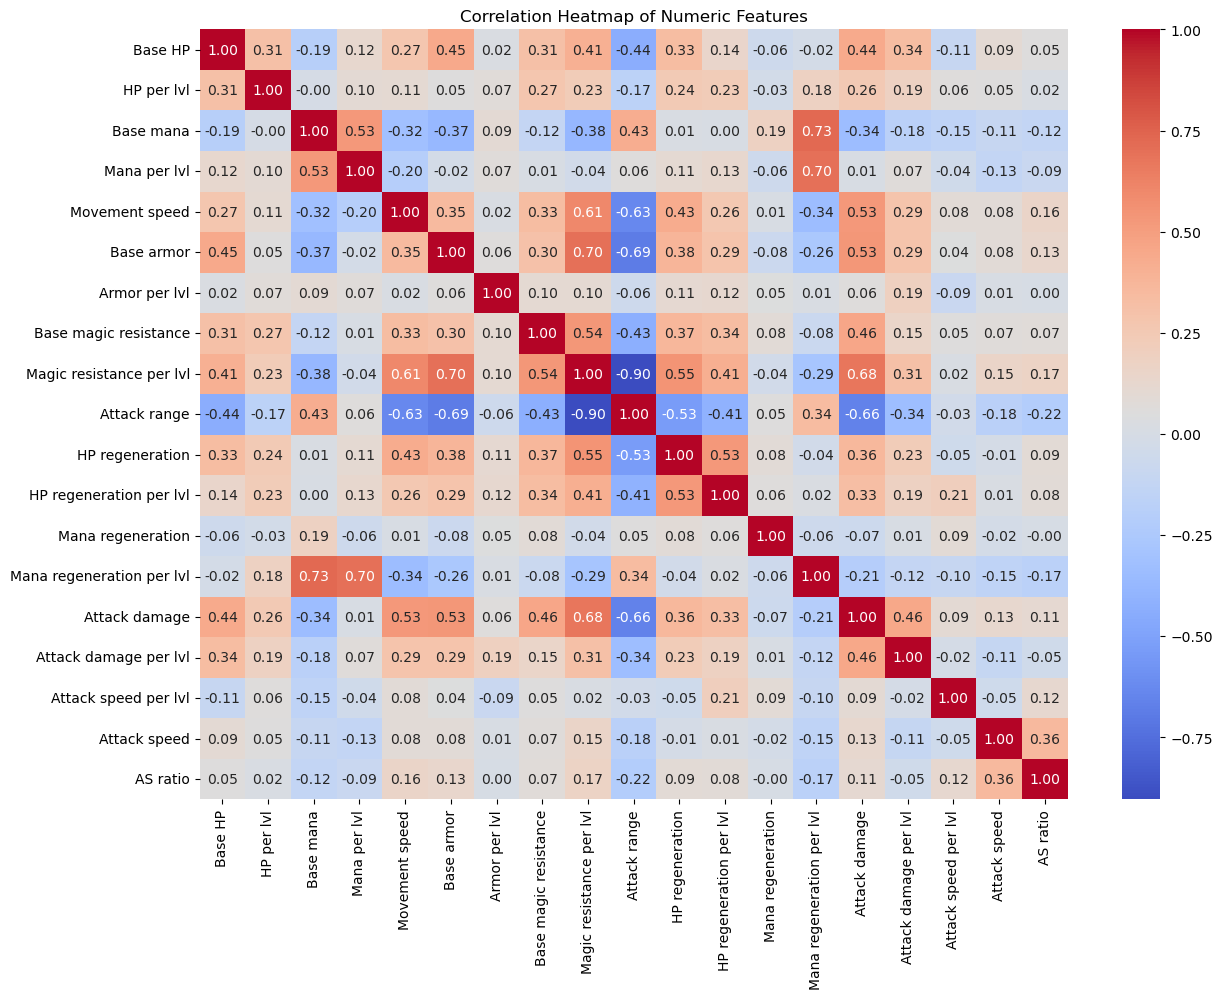

In [19]:
numeric_df=df.select_dtypes(include=[np.number])
plt.figure(figsize=(14,10))
correaltion=numeric_df.corr()
sns.heatmap(correaltion,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

## Lets see at champions by overall Performance

C:\Users\Zbyszek\AppData\Local\Temp\ipykernel_4176\2094943011.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




AttributeError: 'Text' object has no property 'fontize'

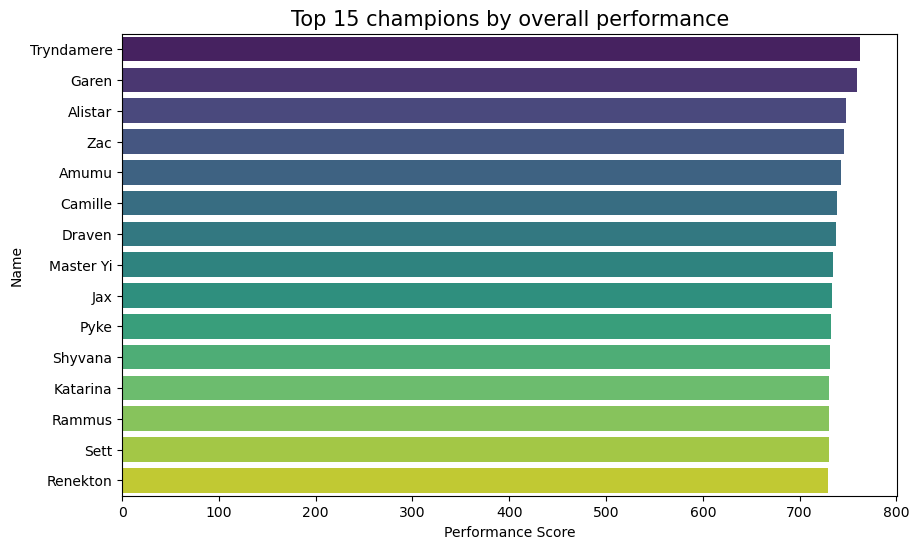

In [22]:
palette=sns.color_palette('viridis',15)
df['Overall Performance']=df['Attack damage']+df['Attack speed']+df['Base HP']
top_15=df.nlargest(15,'Overall Performance')
plt.figure(figsize=(10,6))
sns.barplot(x='Overall Performance',y='Name',data=top_15,palette=palette)
plt.title('Top 15 champions by overall performance',fontsize=15)
plt.xlabel('Performance Score',fontize=13)
plt.ylabel('Name of the champion',fontsize=13)
plt.show()

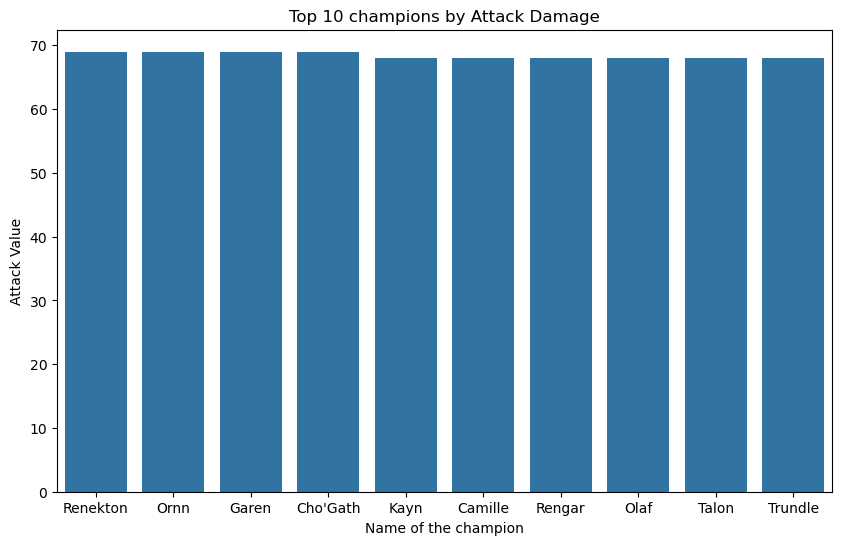

In [24]:
# Lets take a look at top 10 champions with basic Attack damage
sorted_by_AD_champs=df.sort_values(by='Attack damage',ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=sorted_by_AD_champs['Name'][:10],y=sorted_by_AD_champs['Attack damage'][:10])
plt.title('Top 10 champions by Attack Damage')
plt.xlabel('Name of the champion')
plt.ylabel('Attack Value')
plt.show()

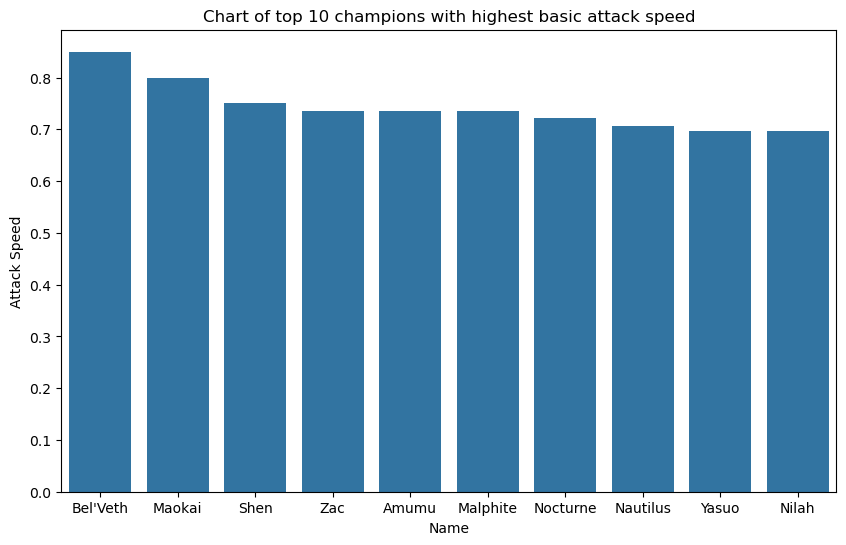

In [25]:
#Now consider to check top 10 champions by attack speed
sorted_by_attack_speed=df.sort_values(by='Attack speed',ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=sorted_by_attack_speed["Name"][:10],y=sorted_by_attack_speed['Attack speed'][:10])
plt.title('Chart of top 10 champions with highest basic attack speed')
plt.xlabel('Name')
plt.ylabel('Attack Speed')
plt.show()

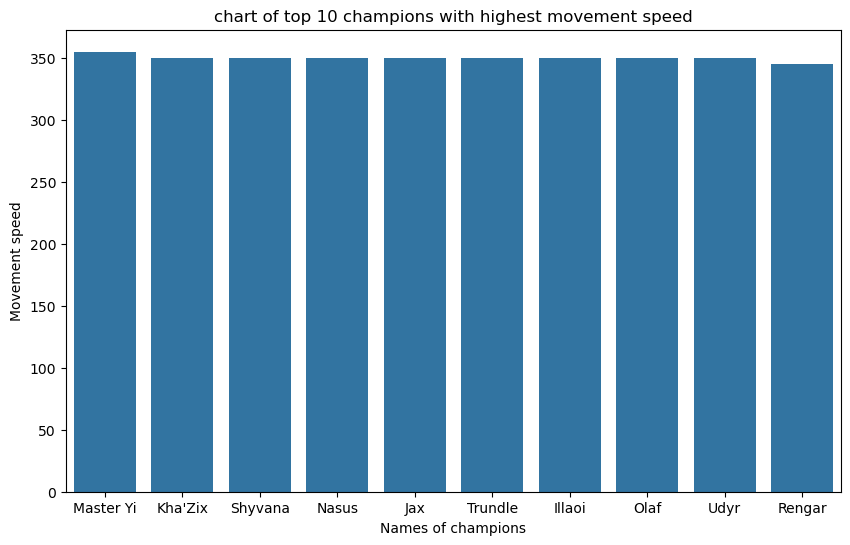

In [27]:
#Top champions with highest movement speed
sorted_by_mov_speed=df.sort_values(by='Movement speed',ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=sorted_by_mov_speed['Name'][:10],y=sorted_by_mov_speed['Movement speed'][:10])
plt.title('chart of top 10 champions with highest movement speed')
plt.xlabel('Names of champions')
plt.ylabel('Movement speed')
plt.show()

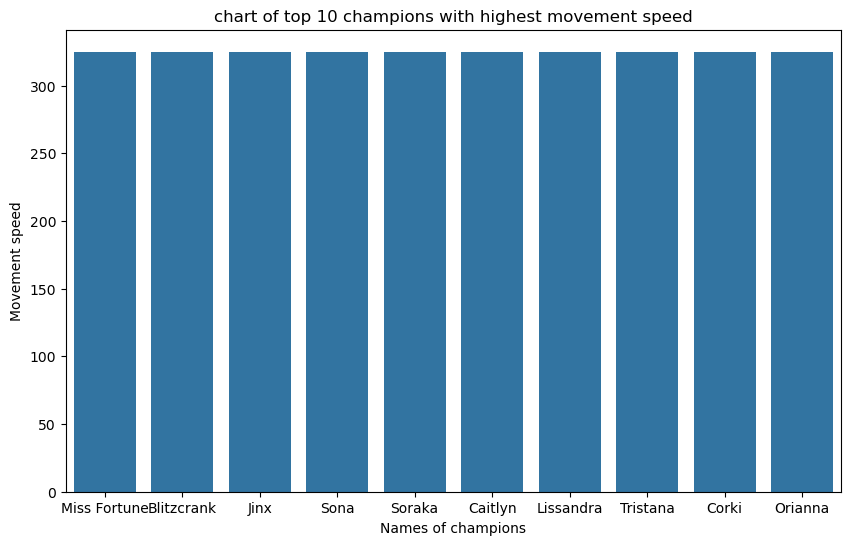

In [30]:
#Now Lets take a look at top 10 champions with lowest movement speed
top_10_lowest_MS = df.nsmallest(5, 'Movement speed')
sorted_by_mov_speed=df.sort_values(by='Movement speed',ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='Movement speed', y='Name', data=top_10_lowest_MS, palette=palette)
axes[1, 1].set_title('Top 5 Champions with the Lowest Movement Speed', fontsize=16)
axes[1, 1].set_xlabel('Movement Speed', fontsize=14)
axes[1, 1].set_ylabel('Champion Name', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()